# `clust-learn` - Module 1: Data Preprocessing 数据预处理

Results from ML models are only as good as the data they are trained on. This is the reason why data preprocessing is essential to obtain robust and reliable results. 

机器学习模型的成果仅与它们训练的数据的好有关。这就是为什么数据预处理对于获得稳健和可靠的结果至关重要。

This guide shows you how to use the `data_preprocessing` module of the `clust-learn` package to perform missing data assessment and imputation, and outlier detection.

本指南向您展示如何使用 `clust-learn` 包中的 `data_preprocessing` 模块进行缺失数据评估和插补，以及异常值检测。

## 0. Setup

In [1]:
import numpy as np
import pandas as pd

from clearn.data_preprocessing import *

pd.set_option('display.max_columns', None)

## 1. Data loading

In [2]:
# Load data # 加载数据
df = pd.read_csv('data_MAC/data_澳门_modified.csv')

df.head()

,IDCNTRY,IDPOP,IDGRADER,IDGRADE,IDSCHOOL,ITLANG_CQ,LCID_CQ,ACBG03A,ACBG03B,ACBG04,ACBG05A,ACBG05B,ACBG06A,ACBG06B,ACBG06C,ACBG07A,ACBG07B,ACBG07C,ACBG08,ACBG09,ACBG10AA,ACBG10AB,ACBG10AC,ACBG10AD,ACBG10AE,ACBG10AF,ACBG10AG,ACBG10AH,ACBG10AI,ACBG10AJ,ACBG10BA,ACBG10BB,ACBG10BC,ACBG10BD,ACBG11A,ACBG11B,ACBG11C,ACBG11D,ACBG11E,ACBG11F,ACBG11G,ACBG11H,ACBG11I,ACBG11J,ACBG11K,ACBG11L,ACBG12A,ACBG12B,ACBG12C,ACBG12D,ACBG12E,ACBG12F,ACBG12G,ACBG12H,ACBG12I,ACBG12J,ACBG13,ACBG14A,ACBG14B,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG15,ACBG16,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,SCHWGT,STOTWGTU,WGTADJ1,WGTFAC1,JKCREP,JKCZONE,ACBGRRS,ACDGRRS,ACBGEAS,ACDGEAS,ACBGDAS,ACDGDAS,ACDGSBC,ACDGTIHY,VERSION,SCOPE,WAVE,IDCLASS,IDSTUD,ITSEX,ITADMINI,ITLANG_SA,LCID_SA,IDBOOK,RP41B01,RP41B02,RP41B03,RP41B04,RP41B05,RP41B06,RP41B07,RP41B08,RP41B09,RP41B10,RP41B11,RP41B12,RP41B13,RP41B14,RP41B15,RP41B16,RP41B17,RP51C01,RP51C02,RP51C03,RP51C04,RP51C05,RP51C06,RP51C07,RP51C08,RP51C09,RP51C10,RP51C11,RP51C12,RP51C13A,RP51C13B,RP51C14,RP51C15,RP51D01,RP51D02,RP51D03,RP51D04,RP51D05,RP51D06,RP51D07,RP51D08,RP51D09,RP51D10,RP51D11A,RP51D11B,RP51D12A,RP51D12B,RP51D13,RP51D14,RP51D15,RP51D16,RP41E01,RP41E02,RP41E03,RP41E04,RP41E05,RP41E06,RP41E07,RP41E08,RP41E09,RP41E10,RP41E11,RP41E12,RP41E13,RP41E14,RP41E15,RP41E16,RP41E17,RP41H01,RP41H02,RP41H03,RP41H04,RP41H05,RP41H06,RP41H07,RP41H08,RP41H09,RP41H10,RP41H11,RP41H12,RP41H13,RP41H14,RP41H15,RP41H16,RP41I01,RP41I02,RP41I03,RP41I04,RP41I05,RP41I06,RP41I07,RP41I08,RP41I09,RP41I10,RP41I11,RP41I12,RP41I13,RP41I14,RP41I15,RP21K01,RP21K02,RP21K03,RP21K04,RP21K05,RP21K06,RP21K07,RP21K08,RP21K09,RP21K10,RP21K11,RP21K12,RP31M01,RP31M02,RP31M03,RP31M04,RP31M05,RP31M06,RP31M07,RP31M08,RP31M09,RP31M10,RP31M11,RP31M12,RP31M13,RP31M14,RP31M15,RP31M16,RP31M17A,RP31M17B,RP31M17C,RP41M01,RP41M02,RP41M03,RP41M04,RP41M05,RP41M06,RP41M07,RP41M08,RP41M09,RP41M10,RP41M11,RP41M12,RP41M13,RP41M14,RP41M15,RP41M16,RP41M17,RP41M18,RP51N01,RP51N02,RP51N03,RP51N04,RP51N05,RP51N06,RP51N07,RP51N08,RP51N09A,RP51N09B,RP51N10,RP51N11,RP51N12,RP51N13A,RP51N13B,RP51N14,RP51N15,RP41O01,RP41O02,RP41O03,RP41O04,RP41O05,RP41O06,RP41O07,RP41O08,RP41O09,RP41O10,RP41O11,RP41O12,RP41O13,RP31P01,RP31P02,RP31P03,RP31P04,RP31P05,RP31P06,RP31P07,RP31P08,RP31P09,RP31P10,RP31P11,RP31P12,RP31P13,RP31P14,RP51R01,RP51R02,RP51R03,RP51R04,RP51R05,RP51R06,RP51R07,RP51R08,RP51R09,RP51R10,RP51R11,RP51R13,RP51R14,RP51R15,RP51R16,RP51R17A,RP51R17B,RP51T01,RP51T02,RP51T03,RP51T04,RP51T05,RP51T06,RP51T07,RP51T08,RP51T09,RP51T10,RP51T11,RP51T12,RP51T13,RP51T14A,RP51T14B,RP51T14C,RP51T14D,RP51T14E,RP51T15,RP51T16,RP31U01,RP31U02,RP31U03,RP31U04,RP31U05,RP31U06,RP31U07,RP31U08,RP31U09,RP31U10,RP31U11,RP31U12,RP31U13,RP31U14,RP31W01,RP31W02,RP31W03,RP31W04,RP31W05,RP31W06,RP31W07A,RP31W07B,RP31W07C,RP31W08,RP31W09,RP31W10,RP31W11,RP31W12,RP31W13,RP21Y01,RP21Y02,RP21Y03,RP21Y04,RP21Y05,RP21Y06,RP21Y07,RP21Y08,RP21Y09,RP21Y10,RP21Y11,RP21Y12,RP21Y13,RP21Y14,RP51Z01,RP51Z02,RP51Z03,RP51Z04,RP51Z05,RP51Z06,RP51Z07,RP51Z08,RP51Z09,RP51Z10,RP51Z11,RP51Z12,RP51Z13,RP51Z14,RP51Z15,RP51C13,RP51D11,RP51D12,RP31M17,RP51N09,RP51N13,RP51R17,RP51T14,RP31W07,RP41BLIKE,RP51CLIKE,RP51DLIKE,RP41ELIKE,RP41HLIKE,RP41ILIKE,RP21KLIKE,RP31MLIKE,RP41MLIKE,RP51NLIKE,RP41OLIKE,RP31PLIKE,RP51RLIKE,RP51TLIKE,RP31ULIKE,RP31WLIKE,RP21YLIKE,RP51ZLIKE,RE41B01,RE41B02,RE41B03,RE41B04,RE41B05,RE41B06,RE41B07,RE41B08,RE41B09,RE41B10,RE41B11,RE41B12,RE41B13,RE41B14,RE41B15,RE41B16,RE41B17,RE51C01A,RE51C01B,RE51C01C,RE51C01D,RE51C01E,RE51C02,RE51C03,RE51C04,RE51C05,RE51C06,RE51C07A,RE51C07B,RE51C07C,RE51C07D,RE51C08,RE51C09,RE51C10,RE51C11,RE51C12,RE51C13A,RE51C13B,RE51C14,RE51C15,RE51D01,RE51D02,RE51D03,RE51D04,RE51D05,RE51D06,RE51D07,RE51D08,RE51D09,RE51D10,RE51D11A,RE51D11B,RE51D12A,RE51D12B,RE51D13,RE51D14,RE51D15,RE51D16,RE41E01,RE41E02,RE41E03,RE41E04,RE41E05,RE41E06,RE41E07,RE41E08,RE41E09,RE41

In [3]:
df.shape

(4579, 1372)

We separate numerical and categorical variables.

我们分离数值型变量和分类变量。

In [4]:
cat_vars = [
    "IDCNTRY", "ITSEX", 
    "ASRIBM", # "ASRIBM01", "ASRIBM02", "ASRIBM03", "ASRIBM04", "ASRIBM05",  # 计算平均“国际阅读量表基准达成”等级
    "ASBG03", "ASBG05A", "ASBG05B", "ASBG05E", "ASBG05F", "ASBG05G",
    "ASBG05H", 
    #台湾：家里有人学小提琴或钢琴等  #香港：智能手表供您自用  #澳门：居民会所
    "ASBG05I", 
    # "台湾：出国旅行  香港：钢琴  澳门：私人车"
    
"ASBG05J", # 台湾缺少
    # "香港：家庭佣工 澳门：Piano钢琴"
"ASBG05K", # 台湾缺少
    #  "香港：家中两间或以上浴室 澳门：按摩躺椅"
    
    "ASBG06", "ASBG07A", "ASBG07B", "ASBG08A", "ASBG08B",
    "ASBG10F", 
    "ASBR03A", "ASBR03B", "ASBR03C", "ASBR04", "ASBR05", 
    "ASDGSEC", "ASDGSSB", "ASDGSB", "ASDGERL","ASDGDRL", "ASDGSLR", "ASDGSCR", "ASDG05S", 
    
    "ASBH02A", "ASBH02B", 
    "ASBH03A", 
    # "台湾：普通话  香港：广东话  澳门：中文 (if ITLANG = 10) 
    "ASBH03B",
    # "台湾：台湾(福建)话   香港：普通话 澳门：中文
    "ASBH03C",
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH03D", 
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语"
    "ASBH03E", 
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    
# "ASBH03F", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
    
    "ASBH04", "ASBH06",
    "ASBH07F",
    "ASBH09", "ASBH14A", "ASBH14B","ASBH14C", "ASBH16", 
    "ASBH18AA", 
    # "台湾：普通话 香港：广东话 澳门： 中文（如果ITLANG = 10）
    "ASBH18AB", 
    # "台湾：普通话 香港：广东话 澳门：中文（如果ITLANG = 10
    "ASBH18BA",
    # "台湾：台湾(福建) 香港：普通话 澳门：中文（如ITLANG = 1或45）
    "ASBH18BB",
    # "台湾：台湾(福建) 香港：普通话 澳门：中文（如ITLANG = 1或45）
    "ASBH18CA", 
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH18CB", 
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH18DA", 
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语"
    "ASBH18DB",
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语" 
    "ASBH18EA",
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    "ASBH18EB", 
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    
# "ASBH18FA", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
# "ASBH18FB", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
    
    "ASBH19", "ASBH20A", "ASBH20B", "ASBH20C", "ASBH21A", "ASBH21B","ASBH21C", "ASBH21D", "ASBH22", 
    "ASDGHRL", "ASDHSES", "ASDHELA", "ASDHENA", "ASDHELN", "ASDHELT","ASDHPCS", "ASDHPLR", "ASDHAPS", "ASDHEDUP", "ASDHOCCP", 
    
    "ACBG04", "ACBG05A", "ACBG05B", "ACBG07A", "ACBG07B", "ACBG07C", "ACBG08", 
    "ACBG13", "ACBG14A", "ACBG14B", "ACBG14C", "ACBG14D", "ACBG14E", "ACBG14F", "ACBG14G",
    "ACBG14H", "ACBG14I", "ACBG14J", "ACBG14K", "ACBG14L", "ACBG14M", "ACBG14N", "ACBG17", "ACBG18A",
    "ACBG18B", "ACBG18C", "ACBG19", "ACBG20", "ACBG21A", "ACBG21B", "ACBG21C", "ACBG21D", "ACBG21E","ACBG21F", 
    "ACDGRRS", "ACDGEAS", "ACDGDAS", "ACDGSBC", 
    
    "ATBG02", "ATBG03", 
    "ATBG05AA",
    # Hong Kong SAR TQG-05AA-AD D 高等教育 
    # Macao TQG-05AA-AD D 大学Post-secondary (if ITLANG = 1 or 10)
    # Chinese Taipei TQG-05AA-AD D University or college
    "ATBG05AB", 
    "ATBG05AC",
    # Hong Kong SAR TQG-05AC D Chinese language
    # Macao TQG-05AC D Chinese (if ITLANG =10)
    # Chinese Taipei TQG-05AC D Chinese related
    "ATBG05AD",
    # Hong Kong SAR TQG-05AA-AD D 高等教育 
    # Macao TQG-05AA-AD D 大学Post-secondary (if ITLANG = 1 or 10)
    # Chinese Taipei TQG-05AA-AD D University or college 
    "ATBG05BA", 
    # Chinese Taipei TQG-05BA D Mandarin普通话
    # Hong Kong SAR TQG-05BA D Chinese language
    # Macao TQG-05BA D Chinese (if ITLANG =10) / 
    "ATBG05BB", "ATBG05BC", "ATBG05BD", "ATBG05BE",
    "ATBG05BF", "ATBG05BG", "ATBG05BH", "ATBG05BI", "ATBG05BJ", "ATBG05BK", "ATBG06", "ATBG07AA",
    "ATBG07BA", "ATBG07AB", "ATBG07BB", "ATBG07AC", "ATBG07BC", "ATBG07AD", "ATBG07BD", "ATBG07AE",
    "ATBG07BE", "ATBG07AF", "ATBG07BF", "ATBG07AG", "ATBG07BG", "ATBG08A", "ATBG08B", "ATBG08C",
    "ATBG08D", "ATBG08E", "ATBG09A", "ATBG09B", "ATBG09C", "ATBG09D", 
    "ATBR06A", "ATBR06B", "ATBR06C", "ATBR06D",
    "ATBR06E", "ATBR07AA", "ATBR07AB", "ATBR07AC", "ATBR07AD", "ATBR07BA", "ATBR07BB", "ATBR07BC",
    "ATBR07BD", "ATBR08A", "ATBR08B", "ATBR08C", "ATBR08D", "ATBR08E", "ATBR08F", "ATBR08G", "ATBR08H",
    "ATBR09A", "ATBR09B", "ATBR09C", "ATBR09D", "ATBR09E", "ATBR09F", "ATBR09G", "ATBR09H", "ATBR09I",
    "ATBR10A", "ATBR10B", "ATBR10C", "ATBR10D", "ATBR10E", "ATBR10F", "ATBR10G", "ATBR10H", "ATBR10I",
    "ATBR10J", "ATBR10K", "ATBR10L", "ATBR11A", "ATBR11B", "ATBR11C", "ATBR11D", "ATBR11E", "ATBR12A",
    "ATBR12BA", "ATBR12BB", "ATBR12BC", "ATBR12BD", "ATBR12C", "ATBR12DA", "ATBR12DB", "ATBR12DC",
    "ATBR12EA", "ATBR12EB", "ATBR12EC", "ATBR12ED", "ATBR12EE", "ATBR13A", "ATBR13B", "ATBR13C",
    "ATBR13D", "ATBR13E", "ATBR14", "ATBR15", "ATBR16", "ATBR17A", "ATBR17B", "ATBR17C", "ATBR18A",
    "ATBR18B", "ATBR18C", "ATBR18D", "ATBR18E", "ATBR19", "ATDGEAS", "ATDGSOS", "ATDGTJS", "ATDGSLI"
]

num_vars = [
    "ASDAGE", 
    "ASRREA", # "ASRREA01", "ASRREA02", "ASRREA03", "ASRREA04", "ASRREA05",  # 计算平均“总体阅读”得分
    "ASRLIT", # "ASRLIT01", "ASRLIT02", "ASRLIT03", "ASRLIT04", "ASRLIT05",  # 计算平均“文学目的”得分
    "ASRINF", # "ASRINF01", "ASRINF02", "ASRINF03", "ASRINF04", "ASRINF05",  # 计算平均“信息性目的”得分
    "ASRIIE", # "ASRIIE01", "ASRIIE02", "ASRIIE03", "ASRIIE04", "ASRIIE05",  # 计算平均“解释过程”得分
    "ASRRSI", # "ASRRSI01", "ASRRSI02", "ASRRSI03", "ASRRSI04", "ASRRSI05",   # 计算平均“直接过程”得分
    "ASBGSEC", "ASBGSSB", "ASBGSB", "ASBGERL", "ASBGDRL", "ASBGSLR", "ASBGSCR",
    "ASBGHRL", "ASBHSES", "ASBHELA", "ASBHENA", "ASBHELN", "ASBHELT", "ASBHPCS", "ASBHPLR", 
    "ACBG09", "ACBG15", "ACBG16", 
    "ACBGRRS", "ACBGEAS", "ACBGDAS", "ACDGTIHY", 
    "ATBG01", "ATBR01A", "ATBR01B","ATBR02A", "ATBR02B",
    "ATBGEAS", "ATBGSOS", "ATBGTJS", "ATBGSLI", "ATDGLIHY", "ATDGRIHY"
]


In [5]:
# 打印数值变量和分类变量
print('数值变量:', len(num_vars))
print('分类变量:', len(cat_vars))

数值变量: 39
分类变量: 238


In [6]:
# 移除方差为零的数值变量
num_vars_filtered = [var for var in num_vars if df[var].var() > 0]
# 更新 num_vars 并筛选 DataFrame
num_vars = num_vars_filtered  # 确保后续步骤使用过滤后的变量列表

# 移除分类变量中唯一值总数小于2的分类变量 和 方差为零的分类变量
cat_vars_filtered = [var for var in cat_vars if df[var].nunique() >= 2 and df[var].var() > 0]
# 添加额外检查：删除唯一值数量为1的变量
cat_vars_filtered = [var for var in cat_vars_filtered if df[var].nunique() > 1]
# 更新 num_vars 并筛选 DataFrame
cat_vars = cat_vars_filtered  # 确保后续步骤使用过滤后的变量列表
# print(df[cat_vars].nunique())

# 检查数据类型
# 检查并更改分类变量的数据类型
for var in cat_vars:
    if df[var].dtype != "Int64":
        if df[var].isnull().any():
            # print(f"{var} 包含 NaN 值，转换为支持 NaN 的 Int64 类型")
            df[var] = df[var].astype("Int64")  # 转换为支持 NaN 的整数类型
        else:
            df[var] = df[var].astype("int64")
        # print(f"{var} 已更改为分类变量 (Int64)")
        
# 检查并更改数值变量的数据类型
for var in num_vars:
    if df[var].dtype != "float64":
        if df[var].isnull().any():
            # print(f"{var} 包含 NaN 值，填充为 0 后转换为 float64")
            df[var] = df[var].fillna(0).astype("float64")  # 填充 NaN 值
        else:
            df[var] = df[var].astype("float64")
        # print(f"{var} 已更改为数值变量 (float64)")

# 提取指定的列，组成新的 DataFrame
columns_to_extract = num_vars + cat_vars
df = df[columns_to_extract]

# 原始数据样本数
print(f"原始数据样本数: {len(df)}")
print(df.shape, '>>', df.isnull().sum().sum())
# 打印数值变量和分类变量
print('数值变量:', len(num_vars), num_vars)
print('分类变量:', len(cat_vars), cat_vars)


# 检查数值变量的方差
zero_variance_vars = [var for var in num_vars if df[var].var() == 0]
print("方差为零的变量:", zero_variance_vars)

# 检查分类变量的唯一值数量
low_unique_vars = [var for var in cat_vars if df[var].nunique() <= 1]
print("唯一值数量小于等于1的变量:", low_unique_vars)

原始数据样本数: 4579
(4579, 276) >> 11765
数值变量: 39 ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
分类变量: 237 ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH

In [7]:
# 插补结果保存
df.to_csv('data_MAC/data_澳门_modified_pre.csv', index=False)

In [8]:
df.head()

,ASDAGE,ASRREA,ASRLIT,ASRINF,ASRIIE,ASRRSI,ASBGSEC,ASBGSSB,ASBGSB,ASBGERL,ASBGDRL,ASBGSLR,ASBGSCR,ASBGHRL,ASBHSES,ASBHELA,ASBHENA,ASBHELN,ASBHELT,ASBHPCS,ASBHPLR,ACBG09,ACBG15,ACBG16,ACBGRRS,ACBGEAS,ACBGDAS,ACDGTIHY,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITSEX,ASRIBM,ASBG03,ASBG05A,ASBG05B,ASBG05E,ASBG05F,ASBG05G,ASBG05H,ASBG05I,ASBG05J,ASBG05K,ASBG06,ASBG07A,ASBG07B,ASBG08A,ASBG08B,ASBG10F,ASBR03A,ASBR03B,ASBR03C,ASBR04,ASBR05,ASDGSEC,ASDGSSB,ASDGSB,ASDGERL,ASDGDRL,ASDGSLR,ASDGSCR,ASDG05S,ASBH02A,ASBH02B,ASBH03A,ASBH03B,ASBH03C,ASBH03D,ASBH03E,ASBH04,ASBH06,ASBH07F,ASBH09,ASBH14A,ASBH14B,ASBH14C,ASBH16,ASBH18AA,ASBH18AB,ASBH18BA,ASBH18BB,ASBH18CA,ASBH18CB,ASBH18DA,ASBH18DB,ASBH18EA,ASBH18EB,ASBH19,ASBH20A,ASBH20B,ASBH20C,ASBH21A,ASBH21B,ASBH21C,ASBH21D,ASBH22,ASDGHRL,ASDHSES,ASDHELA,ASDHENA,ASDHELN,ASDHELT,ASDHPCS,ASDHPLR,ASDHAPS,ASDHEDUP,ASDHOCCP,ACBG04,ACBG05A,ACBG05B,ACBG07A,ACBG07B,ACBG07C,ACBG08,ACBG13,ACBG14A,ACBG14B,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,ACDGRRS,ACDGEAS,ACDGDAS,ACDGSBC,ATBG02,ATBG03,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI
0,9.42,587.780784,542.688460,561.873268,559.364444,572.057562,8.77882,9.15299,8.18398,8.54449,10.98651,11.30153,10.28978,10.89263,10.72985,9.79887,10.50035,10.11630,10.80194,12.13203,9.58447,300.0,17.0,17.0,9.24037,11.32571,12.9615,910.0,32.0,34.0,34.0,1.0,8.0,9.44107,13.6815,8.67953,10.27928,182.0,58.5,1,4,2,1,1,2,2,1,1,2,2,2,3,3,3,2,2,2,1,1,3,1,2,2,2,2,2,2,1,1,3,1,1,1,2,2,2,2,2,2,1,3,1,1,1,6,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2
1,10.42,576.604190,557.383710,612.571176,553.744260,594.721688,10.12086,9.82079,7.90321,10.04280,9.89746,9.17072,7.84162,10.22238,10.34719,7.61837,9.62426,8.57506,11.18387,10.10603,10.14182,300.0,17.0,17.0,9.24037,11.32571,12.9615,910.0,32.0,34.0,34.0,1.0,8.0,9.44107,13.6815,8.67953,10.27928,182.0,58.5,1,4,1,1,2,1,1,1,2,2,2,2,5,2,3,2,2,1,2,1,3,2,4,2,1,2,1,2,2,3,2,1,1,1,2,2,2,2,2,3,2,2,1,1,1,5,1,1,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2
2,10.25,566.230546,527.062732,573.717150,555.513492,571.133264,11.61875,12.85262,10.28695,13.33453,13.15938,9.86291,10.90567,9.91526,9.65449,10.77067,13.20593,11.82488,12.79881,1

## 3. Data preprocessing

### 3.1. Missing values

#### 3.1.1. Missung value assessment 缺失值评估

In [9]:
# 原始数据样本数
print(f"原始数据样本数: {len(df)}")

# 计算缺失值 Computre missing values
n_missing = df.isnull().sum().sum()
print('缺失值 Missing values:', n_missing, f'({n_missing*100/df.size}%)')

原始数据样本数: 4579
缺失值 Missing values: 11765 (0.9309196679231906%)


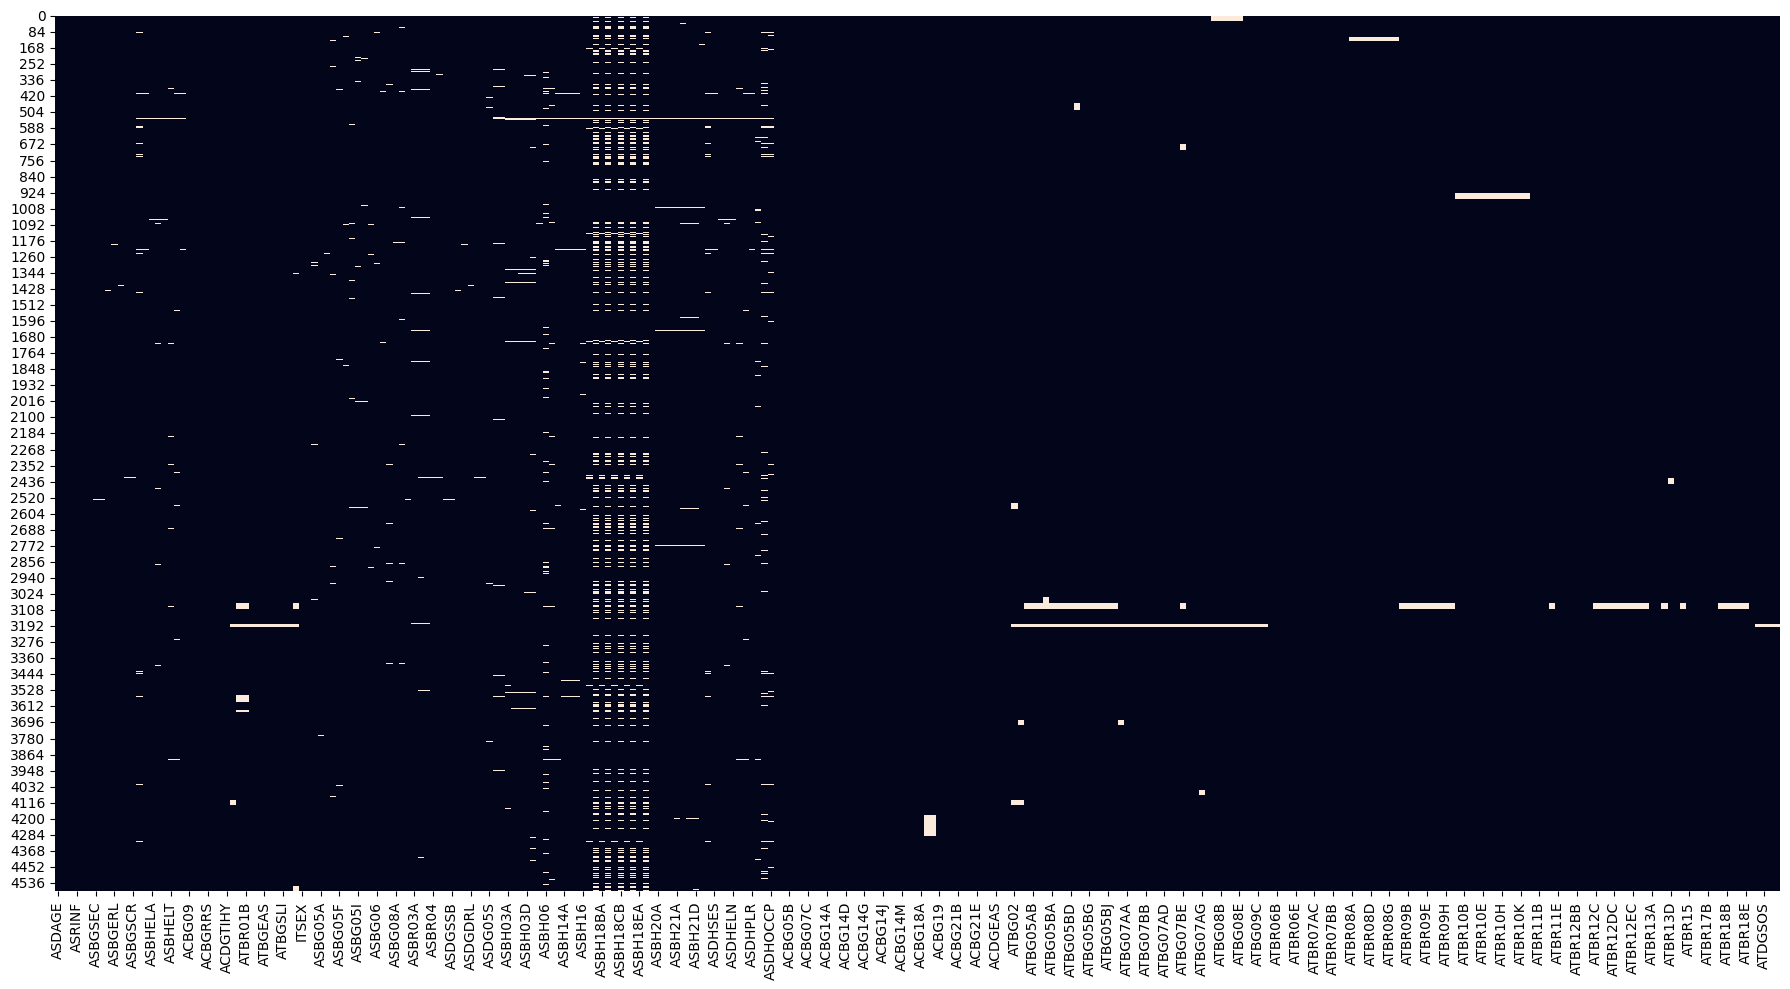

In [10]:
missing_values_heatmap(df) #, output_path='缺失值热图PATH.jpg')

# # 生成缺失值热图 Generate missing values heat map
# missing_values_heatmap(df, output_path=os.path.join("img_MAC", "缺失值热图missing_heatmap.jpg"))
# print("已完成缺失值热图的生成。")

In [11]:
# 打印缺失值统计 Compute missing values
print("打印缺失值统计:\n", compute_missing(df))

# 缺失值比率结果保存
compute_missing(df).to_csv('data_MAC/data_澳门_modified_缺失值比率.csv', index=False)
print("已完成，缺失值比率，结果保存。")

打印缺失值统计:
      var_name    missing
88   ASBH18BB  20.397467
94   ASBH18EB  20.397467
90   ASBH18CB  20.397467
92   ASBH18DB  20.397467
86   ASBH18AB  20.397467
..        ...        ...
271    ATBR19   0.000000
3      ASRINF   0.000000
2      ASRLIT   0.000000
1      ASRREA   0.000000
0      ASDAGE   0.000000

[276 rows x 2 columns]
已完成，缺失值比率，结果保存。


In [12]:
compute_missing(df[num_vars+cat_vars]).describe()

,missing
count,276.000000
mean,0.930920
std,2.742604
min,0.000000
25%,0.000000
50%,0.393099
75%,0.840795
max,20.397467


#### 3.1.2. Data imputation. Easy approach  数据插补。简单的方法

We use the function `impute_missing_values()` that implements all steps of the data imputation methodology in a single call.

我们使用函数 'impute_missing_values（）' 在一次调用中实现数据插补方法的所有步骤。

In [13]:
# Note this is essential for reproducibility. Restart kernel every time you run the analysis for getting same results
# 请注意，这对于可重复性至关重要。每次运行分析时重新启动内核以获得相同的结果
np.random.seed(42)

In [14]:
# 插补缺失值 Impute missing values
# 1.生成一个“插补对”（imputation pairs）的列表，用于确定哪些变量之间具有较强的相关性，可以用来填补缺失值。
# 2.根据第一步生成的“填补对”来填补数据框 df 中的缺失值
# empirical discrete distributions for numerical variables 数值变量：经验离散分布
# linear regression for numerical variables 数值变量：线性分布
# 分类变量：热卡填充（Hot Deck Imputation）
df_imp = impute_missing_values(df, num_vars=num_vars, cat_vars=cat_vars)

--- One-to-one model based imputation for strongly related variables ---


Imputing with empirical discrete distribution ASRIBM -> ASBGSCR
Imputing with empirical discrete distribution ASRRSI -> ASDGSCR
Imputing with empirical discrete distribution ACDGEAS -> ATBGEAS
Imputing with empirical discrete distribution ATBR06B -> ATBGSLI
Imputing with empirical discrete distribution ACBG14K -> ATBGSOS
Imputing with empirical discrete distribution ACBG14H -> ATBGTJS
Imputing with empirical discrete distribution ACBG14M -> ATBR02A
Imputing with empirical discrete distribution ACBG14H -> ATBR02B
Imputing with empirical discrete distribution ACBGEAS -> ATDGEAS
Imputing with empirical discrete distribution ACBG14M -> ATDGLIHY
Imputing with empirical discrete distribution ACBG09 -> ATBR09A
Imputing with empirical discrete distribution ACBG09 -> ATBR12C
Imputing with empirical discrete distribution ACBG09 -> ATBR12EA
Imputing with empirical discrete distribution ACBGEAS -> ATBR12EC
Imputing with empirical discrete distribution ATBR11A -> ATDGRIHY
Imputing with empirical di

In [15]:
print(f"插补缺失值后剩余样本数: {len(df_imp)}")
print(df_imp.shape, '>>', df_imp.isnull().sum().sum())

# 打印数值变量和分类变量
print('数值变量:', len(num_vars))
print('分类变量:', len(cat_vars))

插补缺失值后剩余样本数: 4579
(4579, 276) >> 0
数值变量: 39
分类变量: 237


Let's now check that all values have been imputed and that the resulting variable distributions after imputation look similar to the original ones.

现在，我们检查一下是否所有值都已插补，以及插补后生成的变量分布是否与原始分布相似。

In [16]:
compute_missing(df_imp)

,var_name,missing
275,ATDGSLI,0.0
0,ASDAGE,0.0
1,ASRREA,0.0
2,ASRLIT,0.0
3,ASRINF,0.0
...,...,...
23,ACBG16,0.0
24,ACBGRRS,0.0
25,ACBGEAS,0.0
26,ACBGDAS,0.0


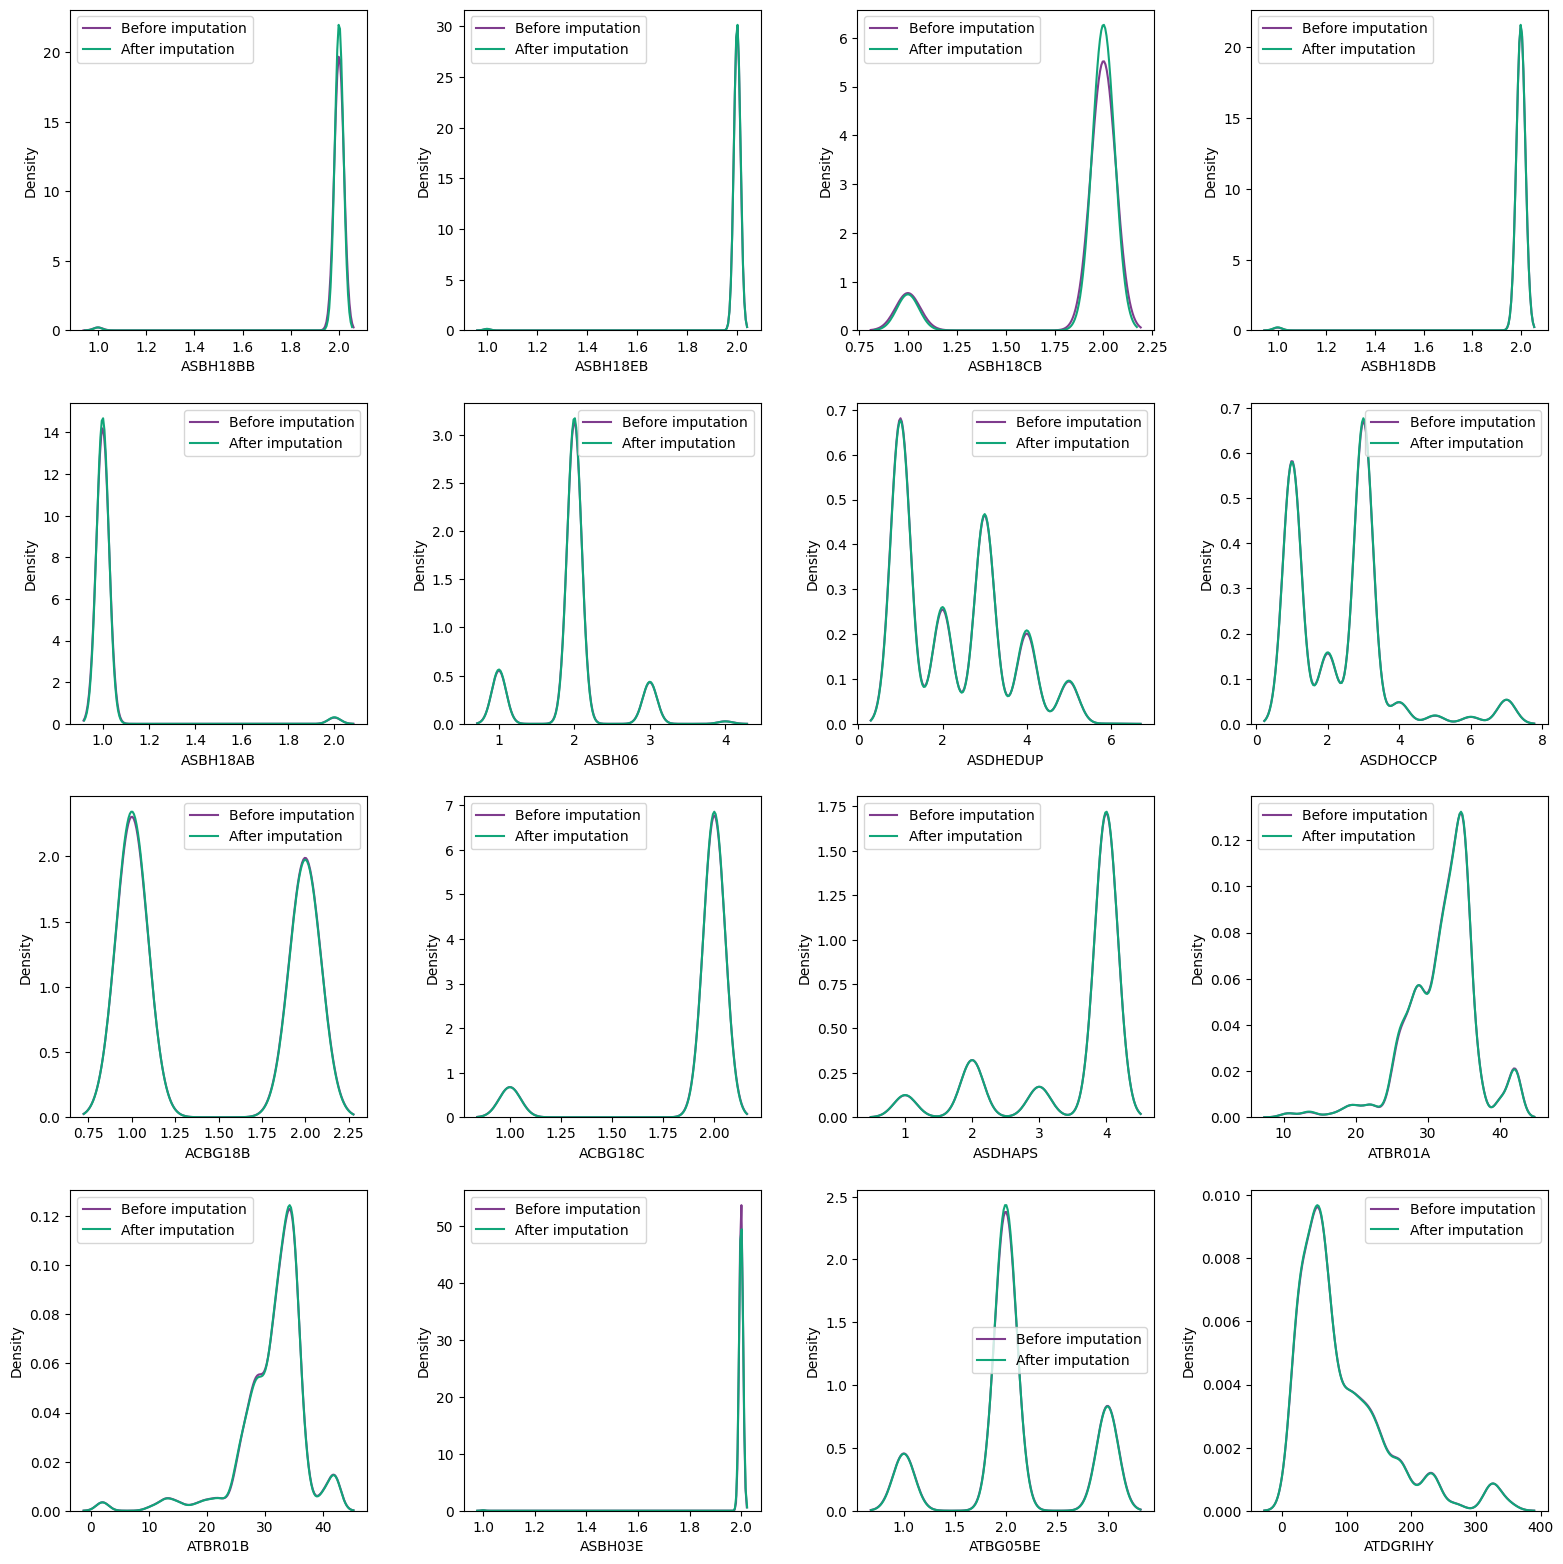

In [17]:
plot_imputation_distribution_assessment(df.loc[df_imp.index], df_imp, list(compute_missing(df).head(16)['var_name']))


# # plot_imputation_distribution_assessment(df.loc[df_imp.index], df_imp, list(compute_missing(df).head(16)['var_name']))
# # 绘制插补前后所选变量分布之间的比较
# # Plot the comparison between the distribution of a selection of variables before and after imputation
# plot_imputation_distribution_assessment(df.loc[df_imp.index], df_imp, list(compute_missing(df).head(16)['var_name']),
#                                         output_path=os.path.join("img_MAC", "插补分布对比图imputation_distribution_assessment.jpg"))
# print("已完成插补分布对比图的生成。")

Save the data frame with imputed values.
使用插补值保存数据框。

In [18]:

# 在数据预处理后添加分类变量类型转换
for var in cat_vars:
    df_imp[var] = df_imp[var].astype(int)

# imputation_output 插补值
df_imp.to_csv('data_MAC/data_澳门_modified_imputation_output.csv', index=False)

### 3.2. Outlier detection 异常值检测

In [19]:
clean, outliers = remove_outliers(df_imp, num_vars+cat_vars)

In [20]:
# 在数据预处理后添加分类变量类型转换
for var in cat_vars:
    df_imp[var] = df_imp[var].astype(int)
# # 插补结果保存
# df_.to_csv('data_MAC/data_澳门_modified_preprocessing.csv', index=False)
# print("已完成导出数据预处理结果，并将结果保存到 CSV 文件中。")


# 清理异常值
clean.to_csv('data_MAC/data_澳门_modified_preprocess_ouput.csv', index=False)
print("已完成导出数据预处理结果，并将结果保存到 CSV 文件中。")

outliers.to_csv('data_MAC/data_澳门_modified_outliers_output.csv', index=False)

已完成导出数据预处理结果，并将结果保存到 CSV 文件中。


In [21]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp.shape, '>>', df_imp.isnull().sum().sum())
print(clean.shape, '>>', clean.isnull().sum().sum())

(4579, 276) >> 11765
(4579, 276) >> 0
(4109, 276) >> 0


In [22]:
print(f"删除异常值后剩余样本数: {len(clean)}")
print(clean.shape, '>>', clean.isnull().sum().sum())
# 打印数值变量和分类变量
print('变量数量:', len(num_vars)+len(cat_vars))
print('数值变量:', len(num_vars), num_vars)
print('分类变量:', len(cat_vars), cat_vars)

删除异常值后剩余样本数: 4109
(4109, 276) >> 0
变量数量: 276
数值变量: 39 ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
分类变量: 237 ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18

In [23]:
# 复制数据框以进行进一步处理
df_ = clean.copy()
# 在降维代码前添加检查
print("分类变量唯一值最大分类数:", df_[cat_vars].nunique().max())

# df_ = df_.reset_index(drop=True)  # 重置索引

# # 在数据预处理后添加分类变量类型转换
# for var in cat_vars:
#     df_[var] = df_[var].astype(int)
# # 插补结果保存
# df_.to_csv('data_MAC/data_澳门_modified_preprocessing.csv', index=False)
# print("已完成导出数据预处理结果，并将结果保存到 CSV 文件中。")

分类变量唯一值最大分类数: 6


## 4. Reproducibility check 可重复性检查

In this section, we check that for the same `numpy` seed, results are reproducible.

在本节中，我们检查对于相同的 'numpy' 种子，结果是可重现的。

### 4.1. Imputation 插补

In [24]:
df_imp_ref = pd.read_csv('data_MAC/data_澳门_modified_imputation_output.csv')
# 检查 df_imp_ref 的列类型


In [25]:
check_df = df_imp_ref.mean().to_frame(name='reference').merge(df_imp.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0


### 4.2. Complete preprocessing process 完整的预处理过程

In [26]:


clean_ref = pd.read_csv('data_MAC/data_澳门_modified_preprocess_ouput.csv')


check_df = clean_ref.mean().to_frame(name='reference').merge(clean.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0


In [27]:
num_list1=num_vars
cat_list1=cat_vars

print('num_vars =', num_list1)
print('cat_vars =', cat_list1)

num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', '

In [28]:
cat_vars = [
    "IDCNTRY", "ITSEX", 
    "ASRIBM", # "ASRIBM01", "ASRIBM02", "ASRIBM03", "ASRIBM04", "ASRIBM05",  # 计算平均“国际阅读量表基准达成”等级
    "ASBG03", "ASBG05A", "ASBG05B", "ASBG05E", "ASBG05F", "ASBG05G",
    "ASBG05H", 
    #台湾：家里有人学小提琴或钢琴等  #香港：智能手表供您自用  #澳门：居民会所
    "ASBG05I", 
    # "台湾：出国旅行  香港：钢琴  澳门：私人车"
    
"ASBG05J", # 台湾缺少
    # "香港：家庭佣工 澳门：Piano钢琴"
"ASBG05K", # 台湾缺少
    #  "香港：家中两间或以上浴室 澳门：按摩躺椅"
    
    "ASBG06", "ASBG07A", "ASBG07B", "ASBG08A", "ASBG08B",
    "ASBG10F", 
    "ASBR03A", "ASBR03B", "ASBR03C", "ASBR04", "ASBR05", 
    "ASDGSEC", "ASDGSSB", "ASDGSB", "ASDGERL","ASDGDRL", "ASDGSLR", "ASDGSCR", "ASDG05S", 
    
    "ASBH02A", "ASBH02B", 
    "ASBH03A", 
    # "台湾：普通话  香港：广东话  澳门：中文 (if ITLANG = 10) 
    "ASBH03B",
    # "台湾：台湾(福建)话   香港：普通话 澳门：中文
    "ASBH03C",
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH03D", 
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语"
    "ASBH03E", 
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    
# "ASBH03F", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
    
    "ASBH04", "ASBH06",
    "ASBH07F",
    "ASBH09", "ASBH14A", "ASBH14B","ASBH14C", "ASBH16", 
    "ASBH18AA", 
    # "台湾：普通话 香港：广东话 澳门： 中文（如果ITLANG = 10）
    "ASBH18AB", 
    # "台湾：普通话 香港：广东话 澳门：中文（如果ITLANG = 10
    "ASBH18BA",
    # "台湾：台湾(福建) 香港：普通话 澳门：中文（如ITLANG = 1或45）
    "ASBH18BB",
    # "台湾：台湾(福建) 香港：普通话 澳门：中文（如ITLANG = 1或45）
    "ASBH18CA", 
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH18CB", 
    # "台湾：客家语 香港：英语 澳门：英语（如果ITLANG = 10或45）"
    "ASBH18DA", 
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语"
    "ASBH18DB",
    # "台湾：土著语言 香港：其他中国方言（如：福建话、上海话等） 澳门：菲律宾语" 
    "ASBH18EA",
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    "ASBH18EB", 
    # "台湾：英语、美式英语 香港：其他亚洲语言（例如：印尼语、泰语、印地语等） 澳门：其他欧洲语言（如法语、西班牙语）
    
# "ASBH18FA", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
# "ASBH18FB", # 澳门缺少，香港缺少
    # "台湾：其他来自东南亚（越南，印度尼西亚，泰国，缅甸，柬埔寨，马来西亚，菲律宾）/其他的新居民语言"
    
    "ASBH19", "ASBH20A", "ASBH20B", "ASBH20C", "ASBH21A", "ASBH21B","ASBH21C", "ASBH21D", "ASBH22", 
    "ASDGHRL", "ASDHSES", "ASDHELA", "ASDHENA", "ASDHELN", "ASDHELT","ASDHPCS", "ASDHPLR", "ASDHAPS", "ASDHEDUP", "ASDHOCCP", 
    
    "ACBG04", "ACBG05A", "ACBG05B", "ACBG07A", "ACBG07B", "ACBG07C", "ACBG08", 
    "ACBG13", "ACBG14A", "ACBG14B", "ACBG14C", "ACBG14D", "ACBG14E", "ACBG14F", "ACBG14G",
    "ACBG14H", "ACBG14I", "ACBG14J", "ACBG14K", "ACBG14L", "ACBG14M", "ACBG14N", "ACBG17", "ACBG18A",
    "ACBG18B", "ACBG18C", "ACBG19", "ACBG20", "ACBG21A", "ACBG21B", "ACBG21C", "ACBG21D", "ACBG21E","ACBG21F", 
    "ACDGRRS", "ACDGEAS", "ACDGDAS", "ACDGSBC", 
    
    "ATBG02", "ATBG03", 
    "ATBG05AA",
    # Hong Kong SAR TQG-05AA-AD D 高等教育 
    # Macao TQG-05AA-AD D 大学Post-secondary (if ITLANG = 1 or 10)
    # Chinese Taipei TQG-05AA-AD D University or college
    "ATBG05AB", 
    "ATBG05AC",
    # Hong Kong SAR TQG-05AC D Chinese language
    # Macao TQG-05AC D Chinese (if ITLANG =10)
    # Chinese Taipei TQG-05AC D Chinese related
    "ATBG05AD",
    # Hong Kong SAR TQG-05AA-AD D 高等教育 
    # Macao TQG-05AA-AD D 大学Post-secondary (if ITLANG = 1 or 10)
    # Chinese Taipei TQG-05AA-AD D University or college 
    "ATBG05BA", 
    # Chinese Taipei TQG-05BA D Mandarin普通话
    # Hong Kong SAR TQG-05BA D Chinese language
    # Macao TQG-05BA D Chinese (if ITLANG =10) / 
    "ATBG05BB", "ATBG05BC", "ATBG05BD", "ATBG05BE",
    "ATBG05BF", "ATBG05BG", "ATBG05BH", "ATBG05BI", "ATBG05BJ", "ATBG05BK", "ATBG06", "ATBG07AA",
    "ATBG07BA", "ATBG07AB", "ATBG07BB", "ATBG07AC", "ATBG07BC", "ATBG07AD", "ATBG07BD", "ATBG07AE",
    "ATBG07BE", "ATBG07AF", "ATBG07BF", "ATBG07AG", "ATBG07BG", "ATBG08A", "ATBG08B", "ATBG08C",
    "ATBG08D", "ATBG08E", "ATBG09A", "ATBG09B", "ATBG09C", "ATBG09D", 
    "ATBR06A", "ATBR06B", "ATBR06C", "ATBR06D",
    "ATBR06E", "ATBR07AA", "ATBR07AB", "ATBR07AC", "ATBR07AD", "ATBR07BA", "ATBR07BB", "ATBR07BC",
    "ATBR07BD", "ATBR08A", "ATBR08B", "ATBR08C", "ATBR08D", "ATBR08E", "ATBR08F", "ATBR08G", "ATBR08H",
    "ATBR09A", "ATBR09B", "ATBR09C", "ATBR09D", "ATBR09E", "ATBR09F", "ATBR09G", "ATBR09H", "ATBR09I",
    "ATBR10A", "ATBR10B", "ATBR10C", "ATBR10D", "ATBR10E", "ATBR10F", "ATBR10G", "ATBR10H", "ATBR10I",
    "ATBR10J", "ATBR10K", "ATBR10L", "ATBR11A", "ATBR11B", "ATBR11C", "ATBR11D", "ATBR11E", "ATBR12A",
    "ATBR12BA", "ATBR12BB", "ATBR12BC", "ATBR12BD", "ATBR12C", "ATBR12DA", "ATBR12DB", "ATBR12DC",
    "ATBR12EA", "ATBR12EB", "ATBR12EC", "ATBR12ED", "ATBR12EE", "ATBR13A", "ATBR13B", "ATBR13C",
    "ATBR13D", "ATBR13E", "ATBR14", "ATBR15", "ATBR16", "ATBR17A", "ATBR17B", "ATBR17C", "ATBR18A",
    "ATBR18B", "ATBR18C", "ATBR18D", "ATBR18E", "ATBR19", "ATDGEAS", "ATDGSOS", "ATDGTJS", "ATDGSLI"
]

num_vars = [
    "ASDAGE", 
    "ASRREA", # "ASRREA01", "ASRREA02", "ASRREA03", "ASRREA04", "ASRREA05",  # 计算平均“总体阅读”得分
    "ASRLIT", # "ASRLIT01", "ASRLIT02", "ASRLIT03", "ASRLIT04", "ASRLIT05",  # 计算平均“文学目的”得分
    "ASRINF", # "ASRINF01", "ASRINF02", "ASRINF03", "ASRINF04", "ASRINF05",  # 计算平均“信息性目的”得分
    "ASRIIE", # "ASRIIE01", "ASRIIE02", "ASRIIE03", "ASRIIE04", "ASRIIE05",  # 计算平均“解释过程”得分
    "ASRRSI", # "ASRRSI01", "ASRRSI02", "ASRRSI03", "ASRRSI04", "ASRRSI05",   # 计算平均“直接过程”得分
    "ASBGSEC", "ASBGSSB", "ASBGSB", "ASBGERL", "ASBGDRL", "ASBGSLR", "ASBGSCR",
    "ASBGHRL", "ASBHSES", "ASBHELA", "ASBHENA", "ASBHELN", "ASBHELT", "ASBHPCS", "ASBHPLR", 
    "ACBG09", "ACBG15", "ACBG16", 
    "ACBGRRS", "ACBGEAS", "ACBGDAS", "ACDGTIHY", 
    "ATBG01", "ATBR01A", "ATBR01B","ATBR02A", "ATBR02B",
    "ATBGEAS", "ATBGSOS", "ATBGTJS", "ATBGSLI", "ATDGLIHY", "ATDGRIHY"
]


In [29]:
# 找出 list1 中有但 list2 中没有的元素
diff1 = list(set(cat_list1) - set(cat_vars))

# 找出 list2 中有但 list1 中没有的元素
diff2 = list(set(cat_vars) - set(cat_list1))

print("list1 有但 list2 没有的元素：", diff1)
print("list2 有但 list1 没有的元素：", diff2)

list1 有但 list2 没有的元素： []
list2 有但 list1 没有的元素： ['IDCNTRY']


In [30]:
# 找出 list1 中有但 list2 中没有的元素
diff1 = list(set(num_list1) - set(num_vars))

# 找出 list2 中有但 list1 中没有的元素
diff2 = list(set(num_vars) - set(num_list1))

print("list1 有但 list2 没有的元素：", diff1)
print("list2 有但 list1 没有的元素：", diff2)

list1 有但 list2 没有的元素： []
list2 有但 list1 没有的元素： []
